In [85]:
# Dependencies
import numpy as np

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, MetaData, Table
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt

In [53]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [54]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [55]:
Base.classes.keys()

['measurement', 'station']

In [56]:
metadata = MetaData()

In [57]:
Measurement_table = Table('Measurement', metadata, autoload=True, autoload_with=engine)
Station_table = Table('Station', metadata, autoload=True, autoload_with=engine)

In [58]:
print(Measurement_table.columns.keys())
print(Station_table.columns.keys())

['id', 'station', 'date', 'prcp', 'tobs']
['id', 'station', 'name', 'latitude', 'longitude', 'elevation']


## D1: Determine the Summary Statistics for June

In [59]:
dt.date.today().strftime("%m")

'04'

In [75]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 

session.query(Measurement.tobs, Measurement.date).\
    filter(func.strftime("%m", Measurement.date) == "06").all()
session.close()

In [76]:
#  3. Convert the June temperatures to a list.
results = session.query(Measurement.tobs, Measurement.date).\
    filter(func.strftime("%m", Measurement.date) == "06").all()
session.close()
print(results)

[(78.0, '2010-06-01'), (76.0, '2010-06-02'), (78.0, '2010-06-03'), (76.0, '2010-06-04'), (77.0, '2010-06-05'), (78.0, '2010-06-06'), (77.0, '2010-06-07'), (78.0, '2010-06-08'), (78.0, '2010-06-09'), (79.0, '2010-06-10'), (78.0, '2010-06-11'), (78.0, '2010-06-12'), (78.0, '2010-06-13'), (77.0, '2010-06-14'), (78.0, '2010-06-15'), (78.0, '2010-06-16'), (77.0, '2010-06-17'), (77.0, '2010-06-18'), (82.0, '2010-06-19'), (78.0, '2010-06-20'), (78.0, '2010-06-21'), (78.0, '2010-06-22'), (78.0, '2010-06-23'), (78.0, '2010-06-24'), (77.0, '2010-06-25'), (76.0, '2010-06-26'), (78.0, '2010-06-27'), (78.0, '2010-06-28'), (78.0, '2010-06-29'), (78.0, '2010-06-30'), (77.0, '2011-06-01'), (78.0, '2011-06-02'), (73.0, '2011-06-03'), (70.0, '2011-06-04'), (76.0, '2011-06-05'), (77.0, '2011-06-06'), (77.0, '2011-06-07'), (77.0, '2011-06-08'), (77.0, '2011-06-09'), (78.0, '2011-06-10'), (77.0, '2011-06-11'), (77.0, '2011-06-12'), (78.0, '2011-06-13'), (78.0, '2011-06-14'), (77.0, '2011-06-15'), (78.0, '2

In [77]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_temps = pd.DataFrame(results)
june_temps.columns = ["June Temps", "Date"]
june_temps

,June Temps,Date
0,78.0,2010-06-01
1,76.0,2010-06-02
2,78.0,2010-06-03
3,76.0,2010-06-04
4,77.0,2010-06-05
...,...,...
1695,79.0,2017-06-26
1696,74.0,2017-06-27
1697,74.0,2017-06-28
1698,76.0,2017-06-29


In [78]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_temps.describe()

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [79]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
session.query(Measurement.tobs, Measurement.date).\
    filter(func.strftime("%m", Measurement.date) == "12").all()
session.close()

In [80]:
# 7. Convert the December temperatures to a list.
results = session.query(Measurement.tobs, Measurement.date).\
    filter(func.strftime("%m", Measurement.date) == "12").all()
session.close()
print(results)

[(76.0, '2010-12-01'), (74.0, '2010-12-03'), (74.0, '2010-12-04'), (64.0, '2010-12-06'), (64.0, '2010-12-07'), (67.0, '2010-12-08'), (77.0, '2010-12-09'), (66.0, '2010-12-10'), (69.0, '2010-12-11'), (68.0, '2010-12-12'), (68.0, '2010-12-13'), (71.0, '2010-12-14'), (74.0, '2010-12-15'), (67.0, '2010-12-16'), (66.0, '2010-12-17'), (69.0, '2010-12-18'), (71.0, '2010-12-19'), (70.0, '2010-12-23'), (70.0, '2010-12-24'), (74.0, '2010-12-26'), (74.0, '2010-12-27'), (71.0, '2010-12-28'), (75.0, '2010-12-29'), (75.0, '2010-12-30'), (72.0, '2010-12-31'), (69.0, '2011-12-01'), (68.0, '2011-12-02'), (73.0, '2011-12-03'), (74.0, '2011-12-04'), (73.0, '2011-12-05'), (73.0, '2011-12-06'), (73.0, '2011-12-07'), (73.0, '2011-12-08'), (71.0, '2011-12-09'), (73.0, '2011-12-10'), (73.0, '2011-12-11'), (77.0, '2011-12-12'), (72.0, '2011-12-13'), (71.0, '2011-12-14'), (73.0, '2011-12-15'), (70.0, '2011-12-16'), (73.0, '2011-12-17'), (69.0, '2011-12-18'), (74.0, '2011-12-19'), (72.0, '2011-12-20'), (71.0, '2

In [81]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_temps = pd.DataFrame(results)
dec_temps.columns = ["Dec Temps", "Date"]
dec_temps

,Dec Temps,Date
0,76.0,2010-12-01
1,74.0,2010-12-03
2,74.0,2010-12-04
3,64.0,2010-12-06
4,64.0,2010-12-07
...,...,...
1512,71.0,2016-12-27
1513,71.0,2016-12-28
1514,69.0,2016-12-29
1515,65.0,2016-12-30


In [82]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_temps.describe()

,Dec Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


(50.0, 85.0)

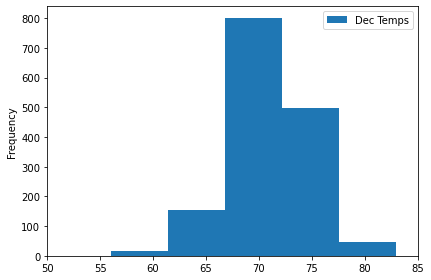

In [98]:
#Create bins for Dec histogram
dec_temps.plot.hist(bins=5)
plt.tight_layout()
plt.xlim(50,85)
plt.xlabel("mean temperature")

(60.0, 90.0)

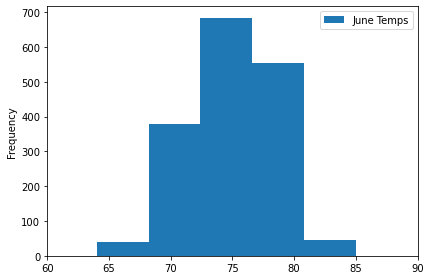

In [96]:
#Create bins for Jun histogram
june_temps.plot.hist(bins=5)
plt.tight_layout()
plt.xlim(50,85)